<a href="https://colab.research.google.com/github/naman065/EE-655-Course-Project/blob/main/Implementation_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EE-655 Course Project
## Implementation Demo

Found 5 images: ['Motorbike.jpg', 'aeroplane.jpg', 'car.jpg', 'person.jpg', 'train.jpg']

0: 640x640 1 motorbike, 313.8ms
1: 640x640 1 aeroplane, 313.8ms
2: 640x640 1 aeroplane, 1 car, 313.8ms
3: 640x640 1 bicycle, 1 person, 313.8ms
4: 640x640 1 train, 313.8ms
Speed: 8.3ms preprocess, 313.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


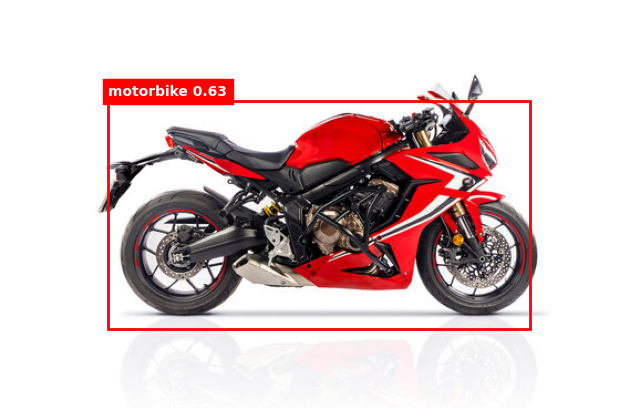

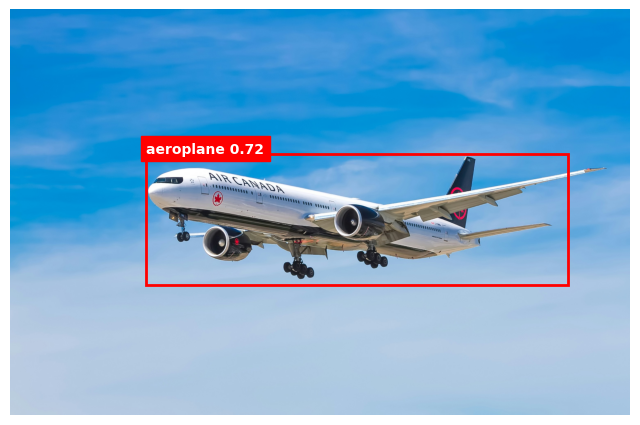

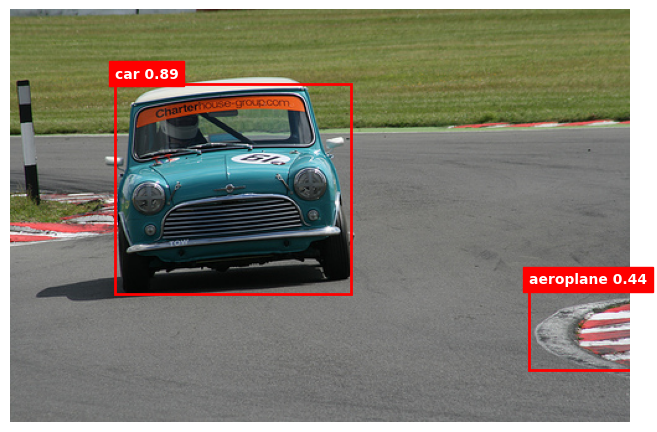

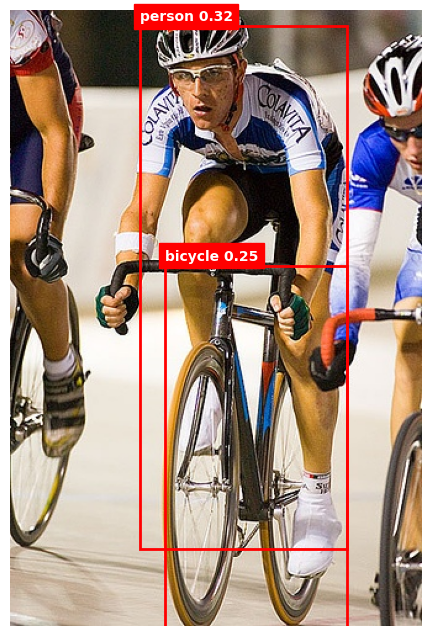

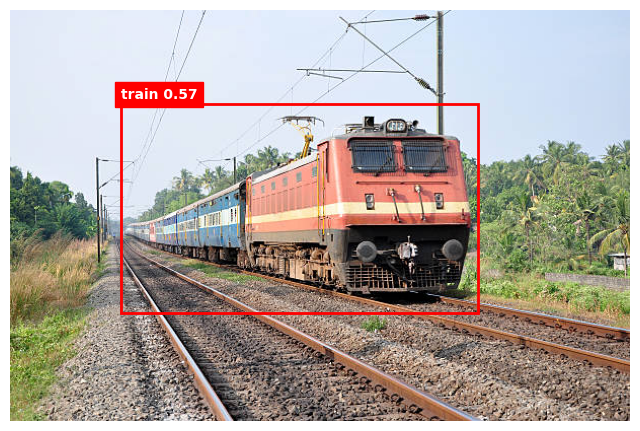

In [11]:

from ultralytics import YOLO
import glob
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# 2) Loading trained model
model = YOLO("/content/best.pt")


img_paths = sorted(glob.glob('*.jpg') + glob.glob('*.png'))[:5]
print(f"Found {len(img_paths)} images:", img_paths)


results = model.predict(source=img_paths, conf=0.25, imgsz=640, save=False)

# 5) Visualizing each result
for img_path, res in zip(img_paths, results):
    img = Image.open(img_path)
    fig, ax = plt.subplots(1, figsize=(8,8))
    ax.imshow(img)
    ax.axis('off')


    for box in res.boxes:
        x1, y1, x2, y2 = box.xyxy[0]
        cls_id = int(box.cls[0])
        conf  = float(box.conf[0])

        rect = patches.Rectangle(
            (x1, y1), x2 - x1, y2 - y1,
            linewidth=2, edgecolor='r', facecolor='none'
        )
        ax.add_patch(rect)

        label = f"{model.names[cls_id]} {conf:.2f}"
        ax.text(
            x1, y1 - 5, label,
            color='white', backgroundcolor='red',
            fontsize=10, weight='bold'
        )
    plt.show()


# Implementation Demo using Rudimentary Frontend

In [21]:
!pip install -q gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 90.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 4.3 MB/s eta 0:00:00


In [28]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np
import gradio as gr

# Load the model
model = YOLO("/content/best.pt")

# Define the function for Gradio
def detect_and_display(uploaded_img):
    # Convert uploaded image to PIL Image
    img = Image.fromarray(uploaded_img)

    # Run YOLO prediction
    results = model.predict(img, conf=0.25, imgsz=640, save=False)
    res = results[0]

    # Create matplotlib figure
    fig, ax = plt.subplots(1, figsize=(8, 8))
    ax.imshow(img)
    ax.axis("off")

    # Draw boxes
    for box in res.boxes:
        x1, y1, x2, y2 = box.xyxy[0]
        cls_id = int(box.cls[0])
        conf = float(box.conf[0])

        # Draw rectangle
        rect = patches.Rectangle(
            (x1, y1), x2 - x1, y2 - y1,
            linewidth=2, edgecolor="r", facecolor="none"
        )
        ax.add_patch(rect)

        # Add label
        label = f"{model.names[cls_id]} {conf:.2f}"
        ax.text(
            x1, y1 - 5, label,
            color="white", backgroundcolor="red",
            fontsize=10, weight="bold"
        )

    # Convert plot to numpy image for return
    fig.canvas.draw()
    output_img = np.array(fig.canvas.renderer.buffer_rgba())
    plt.close(fig)  # Prevents memory leaks

    return output_img

# Launch Gradio app
gr.Interface(
    fn=detect_and_display,
    inputs=gr.Image(type="numpy", label="Upload Image"),
    outputs=gr.Image(type="numpy", label="Prediction Output"),
    title="Complex YOLO Object Detection"
).launch(debug=True, share=True)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://7b1921fe8309a8ba7f.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)



0: 640x448 3 persons, 223.5ms
Speed: 7.4ms preprocess, 223.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7865 <> https://7b1921fe8309a8ba7f.gradio.live
